# MULTIPLE LINEAR REGRESSION MODEL-PROJECT

In [1]:
# Importing important libraries
import numpy as np 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Extracting the dataset
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#checking for null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

C:\Users\Bhagyashree\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


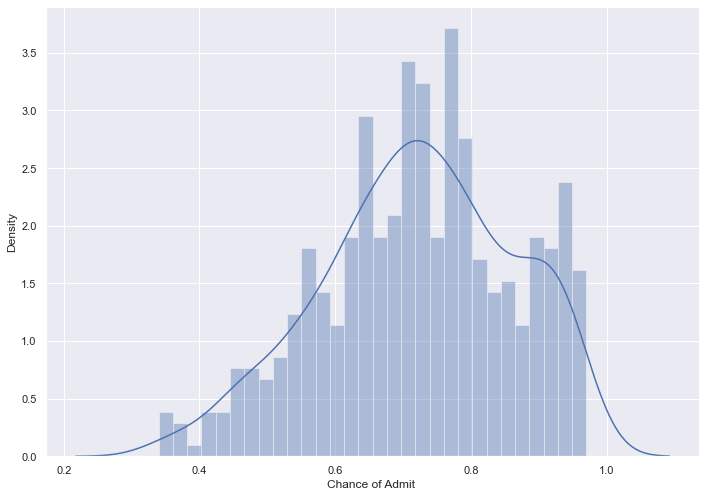

In [4]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Chance of Admit '], bins=30)
plt.show()

In [5]:
# Removing outliers
df.drop(df.index[list((np.where(df['Chance of Admit '] < 0.4)))],inplace = True)

C:\Users\Bhagyashree\Downloads\New folder\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


C:\Users\Bhagyashree\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


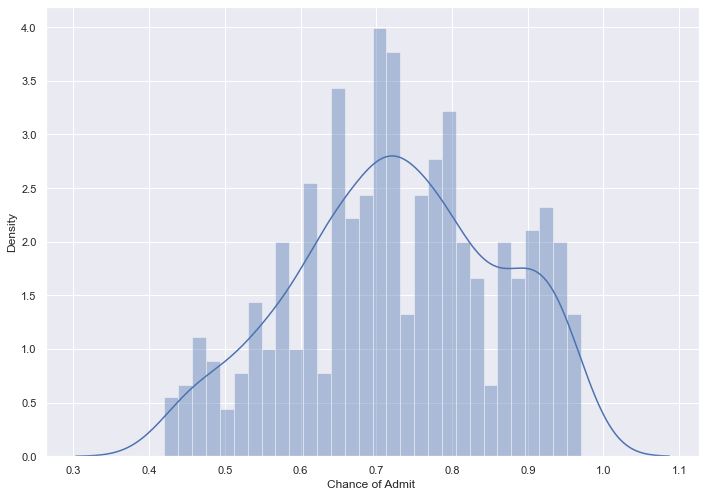

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Chance of Admit '], bins=30)
plt.show()

<AxesSubplot:>

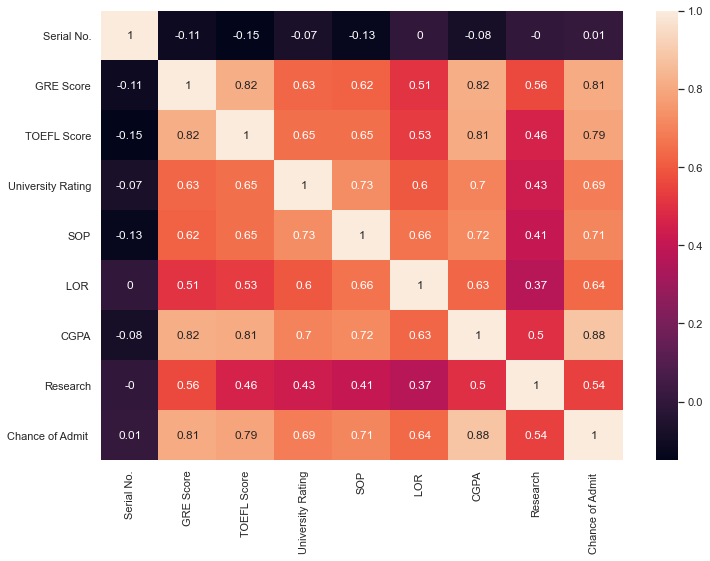

In [7]:
# Correlation Matrix
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
# To fit a linear regression model, we select those features which have a high correlation with our target variable Chance of Admit. 
# By looking at the correlation matrix we can see that CGPA has a strong positive correlation with Chance of Admit (0.88).
#In this case we don't have any negative correlation with Chance of admit.
# An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
# The features GRE Score and TOFEL Score have a correlation of 0.82. These feature pairs are strongly correlated to each other. 
#The features GRE Score and CGPA have a correlation of 0.82. These feature pairs are strongly correlated to each other. 
# We should not select both these features together for training the model.
#We will take GRE Score as feature in training model.

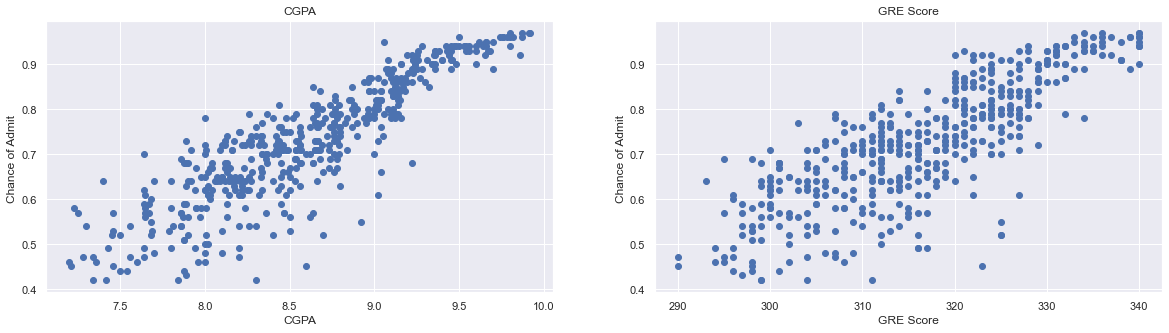

In [9]:
# Scatter Plot
plt.figure(figsize=(20, 5))

features = ['CGPA', 'GRE Score']
target = df['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

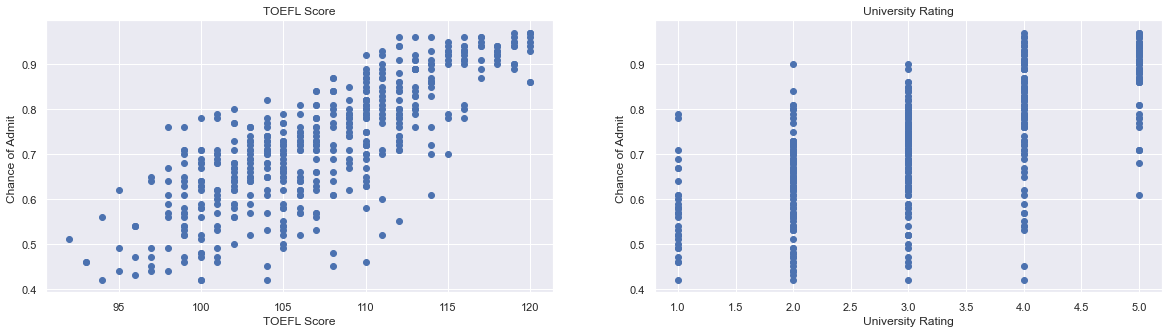

In [10]:
# Scatter Plot
plt.figure(figsize=(20, 5))

features = ['TOEFL Score', 'University Rating']
target = df['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

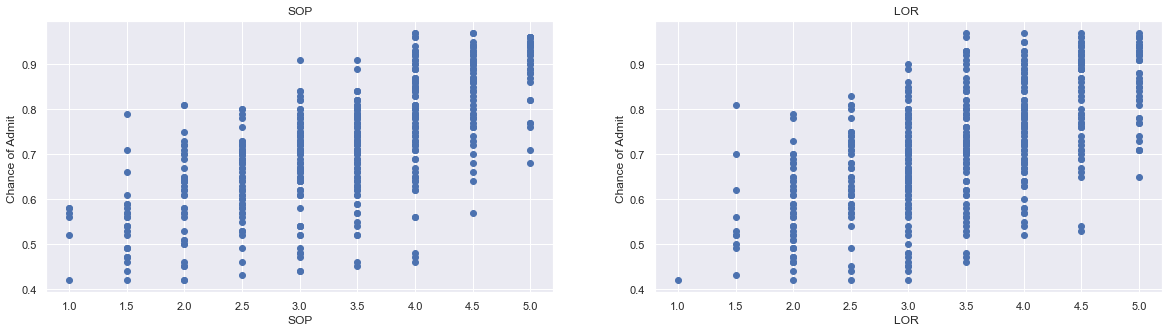

In [11]:
# Scatter Plot
plt.figure(figsize=(20, 5))

features = ['SOP','LOR ']
target = df['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

In [12]:
# Data Preparation
X = pd.DataFrame(np.c_[df['GRE Score'], df['University Rating'],df['LOR ']], columns = ['GRE Score','University Rating','LOR '])
Y = df['Chance of Admit ']

In [13]:
# Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(393, 3)
(99, 3)
(393,)
(99,)


In [14]:
# Building the Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
lin_model.coef_

array([0.00705724, 0.02443758, 0.02970403])

In [16]:
lin_model.intercept_

-1.68964402722345

In [17]:
accuracy_linear_regression=lin_model.score(X_test,Y_test)
accuracy_linear_regression

0.7504250805269773

In [18]:
# Model Evaluation

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 0.06838075795680312
R2 score is 0.74352634708665


The model performance for testing set:


RMSE is 0.06617830063761607
R2 score is 0.7504250805269773


In [19]:
Y_test

242    0.70
449    0.79
76     0.74
354    0.59
265    0.71
       ... 
476    0.62
126    0.85
410    0.54
111    0.69
145    0.81
Name: Chance of Admit , Length: 99, dtype: float64

In [20]:
 y_test_predict

array([0.75932542, 0.74036634, 0.78049713, 0.54434246, 0.66684381,
       0.78902945, 0.76690816, 0.66378998, 0.64640964, 0.65167609,
       0.70286753, 0.50052396, 0.71519122, 0.67137272, 0.83790461,
       0.92332899, 0.62976684, 0.78902945, 0.62755422, 0.79713993,
       0.78829191, 0.92259144, 0.69433521, 0.62344715, 0.84643692,
       0.938181  , 0.64946347, 0.71139985, 0.58742342, 0.65799579,
       0.70360507, 0.77491498, 0.6894906 , 0.77259869, 0.54992462,
       0.69401951, 0.87466587, 0.67537613, 0.6731635 , 0.54813383,
       0.87066246, 0.74289466, 0.69328197, 0.90995205, 0.83790461,
       0.91700929, 0.83611382, 0.71771955, 0.72625186, 0.68169582,
       0.59374312, 0.72477678, 0.75448081, 0.47608638, 0.61417729,
       0.7567971 , 0.86992492, 0.6791675 , 0.67137272, 0.66347428,
       0.79229532, 0.94523824, 0.8943625 , 0.68169582, 0.5513997 ,
       0.84095843, 0.68022074, 0.52622458, 0.61723111, 0.94523824,
       0.69401951, 0.81346703, 0.57257141, 0.61417729, 0.60480

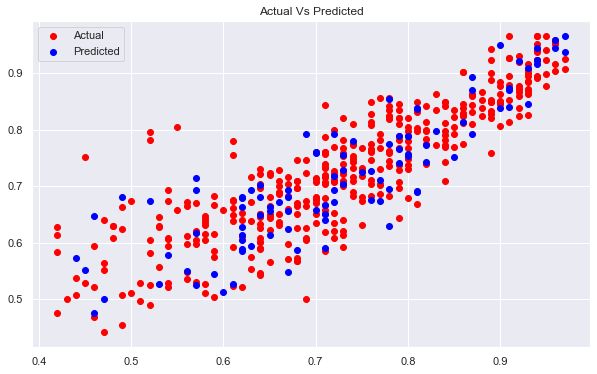

In [21]:


#Chance Predicted Vs Actual Values

plt.figure(figsize=(10,6))  # Set the figure size in inches

#training model
x=Y_train
y= y_train_predict
plt.scatter(x, y, label = "Actual", c = "red")

#testing model
x=Y_test
y= y_test_predict
plt.scatter(x, y, label = "Predicted", c = "blue")



plt.title('Actual Vs Predicted')
plt.legend()
plt.savefig('Scatterplot.png')
plt.show()
